## Project I : Forecasting usage of a city bike share system 
###  Author: Nafis Chowdhury



In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("seaborn-deep")

<ipython-input-1-e5d27e8b2030>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-deep")


The [dataset](https://www.kaggle.com/c/bike-sharing-demand/data) we will use is from a [Kaggle](https://www.kaggle.com) competition. 

You will have to sign up for Kaggle to download it, or just follow this  [link](https://www.dropbox.com/s/qxuigvghpcn8il1/train.csv?dl=0) to download it. 

Some parts of this notebook have been taken from this [Git](https://git.generalassemb.ly/benbell/10-linear-regression/blob/master/solution-code/linear_regression-solution.ipynb) example.

In [8]:
# Read the data and set the datetime as the index. [Remeber to change your file path.]
file = '/content/gdrive/MyDrive/ML-IFIC/Colab Notebooks/bike-sharing-dataset/train.csv'

bikes = pd.read_csv(file, index_col='datetime', parse_dates=True)

In [12]:
# Preview the first five rows of the DataFrame.
bikes.tail(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 14:00:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218
2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237
2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334
2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562
2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### From the Kaggle competition:
######  datetime - hourly date + timestamp  
######  season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
######  holiday - whether the day is considered a holiday
######  workingday - whether the day is neither a weekend nor holiday
######  weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
######  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
######  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
######  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
######  temp - temperature in Celsius
######  atemp - "feels like" temperature in Celsius
######  humidity - relative humidity
######  windspeed - wind speed
######  casual - number of non-registered user rentals initiated
######  registered - number of registered user rentals initiated
######  count - number of total rentals

In [13]:
# Use the .rename() method to rename count to total.
bikes.rename(columns={'count':'total_rentals'}, inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


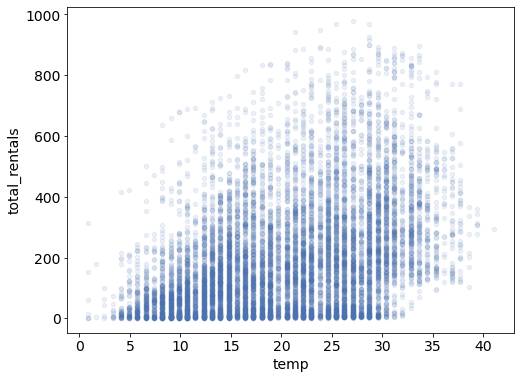

In [14]:
# Pandas scatterplot
bikes.plot(kind='scatter', x='temp', y='total_rentals', alpha=0.1);


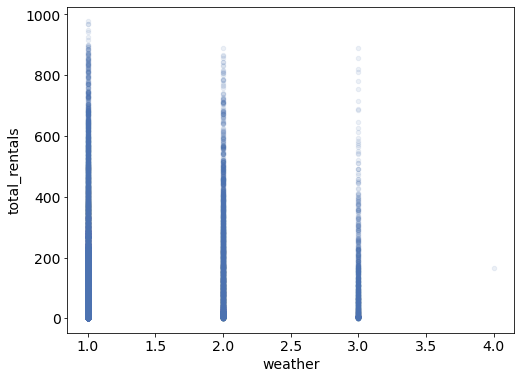

In [15]:
# Pandas scatterplot
bikes.plot(kind='scatter', x='weather', y='total_rentals', alpha=0.1);

One-feature model

In [16]:
# Create X and y.
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total_rentals

In [17]:
print((X.shape),(y.shape))

(10886, 1) (10886,)


In [19]:
from sklearn.linear_model import LinearRegression
# Make an instance of a LinearRegression object.
lr = LinearRegression()
type(lr)

sklearn.linear_model._base.LinearRegression

In [20]:
lr

LinearRegression()

In [21]:
lr.fit(X, y)
# Print the coefficients.
print(lr.intercept_)
print(lr.coef_)

6.046212959616611
[9.17054048]


In [22]:
X_new = [[0], [10]]
lr.predict(X_new)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 6.04621296, 97.75161777])

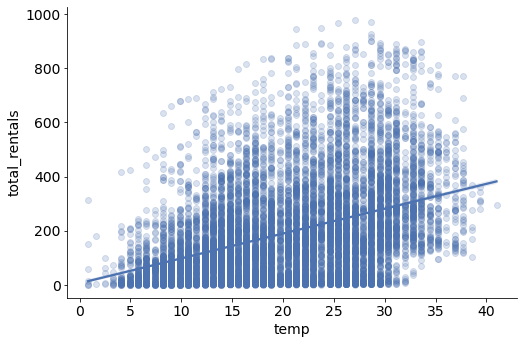

In [23]:
# Seaborn scatterplot with regression line
sns.lmplot(x='temp', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

More features

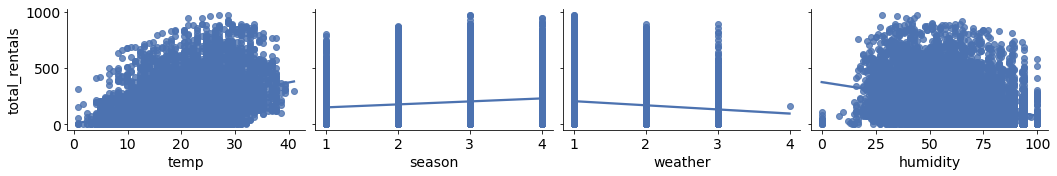

In [24]:
# Create feature column variables
feature_cols = ['temp', 'season', 'weather', 'humidity']
# Multiple scatterplots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total_rentals', kind='reg',aspect=1.5);

now with Pandas

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


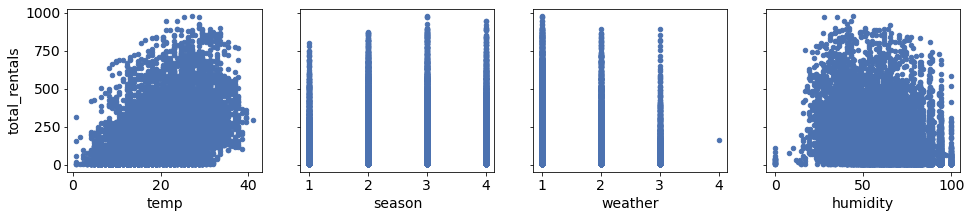

In [25]:
# Multiple scatterplots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total_rentals', ax=axs[index], figsize=(16, 3))

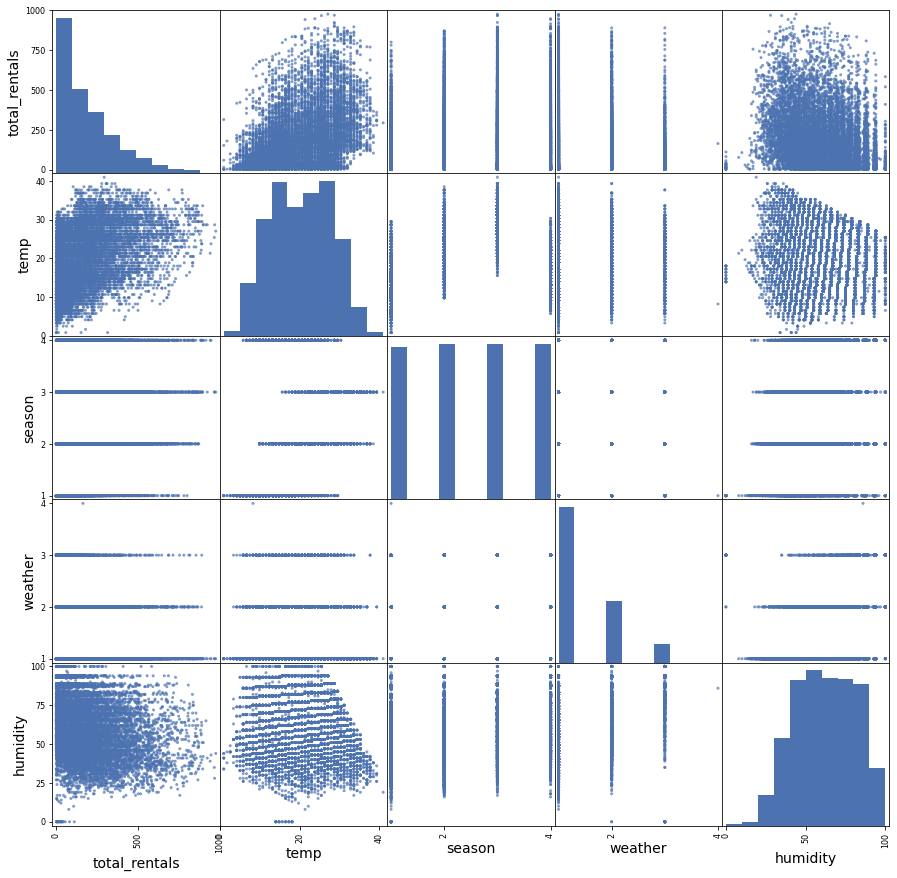

In [26]:
# alternative way in Pandas (might take a while)
# scatter_matrix does a pairplot of *every* column

grr = pd.plotting.scatter_matrix(bikes[['total_rentals'] + feature_cols], figsize=(15, 15), alpha=0.7)

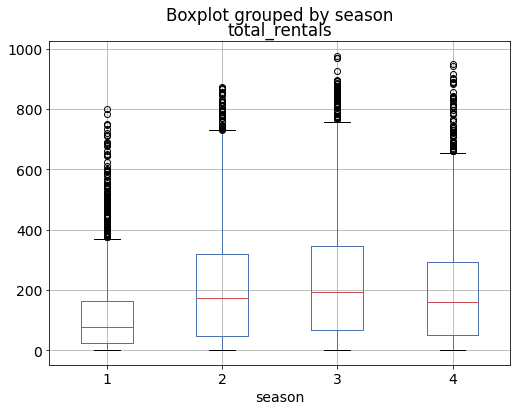

In [27]:
# Box plot of rentals, grouped by season.
bikes.boxplot(column='total_rentals', by='season');

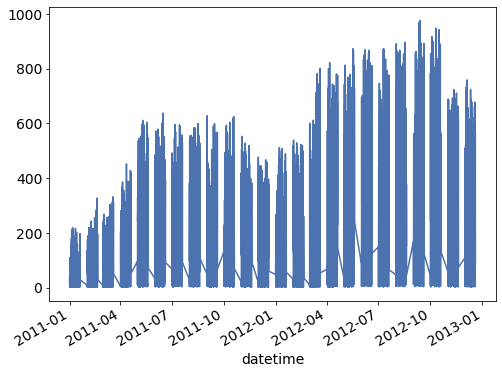

In [28]:
# Line plot of rentals
bikes.total_rentals.plot();

<Axes: xlabel='datetime,datetime'>

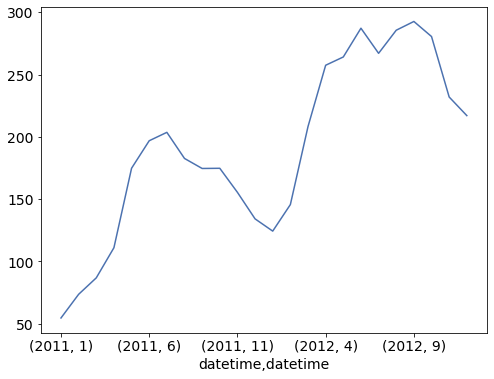

In [29]:
bikes.groupby([bikes.index.year, bikes.index.month]).mean().total_rentals.plot()

<Axes: >

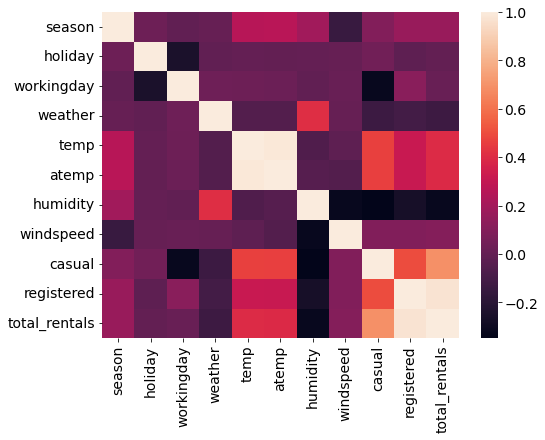

In [30]:

# Visualize correlation matrix in Seaborn using a heat map.
sns.heatmap(bikes.corr())

                   temp     atemp    casual  total_rentals
temp           1.000000  0.984948  0.467097       0.394454
atemp          0.984948  1.000000  0.462067       0.389784
casual         0.467097  0.462067  1.000000       0.690414
total_rentals  0.394454  0.389784  0.690414       1.000000
Axes(0.125,0.125;0.62x0.755)


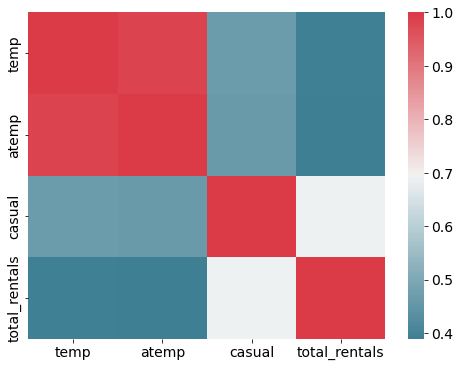

In [31]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikes[['temp', 'atemp', 'casual','total_rentals']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

In [32]:
# Create X and y.
X = bikes[feature_cols]
y = bikes.total_rentals
y=bikes["total_rentals"]

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

159.5206878612979
[ 7.86482499 22.53875753  6.67030204 -3.11887338]


In [33]:
# Pair the feature names with the coefficients.
list(zip(feature_cols, linreg.coef_))

[('temp', 7.86482499247745),
 ('season', 22.538757532466775),
 ('weather', 6.670302035923732),
 ('humidity', -3.118873382396501)]

In [34]:
from sklearn.model_selection import train_test_split

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df.total_rentals
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [35]:
# Compare different sets of features.
import sklearn.metrics as metrics
print(train_test_rmse(bikes, ['temp', 'season', 'weather', 'humidity']))
print(train_test_rmse(bikes, ['temp', 'season', 'weather']))
print(train_test_rmse(bikes, ['temp', 'season', 'humidity']))

155.64945913079674
164.1653997629182
155.59818936691417


#### Comparing Testing RMSE With Null RMSE
The null RMSE is the RMSE that corresponds to always predicting the ypred=y_mean.  It is a benchmark against you want to do better.

In [36]:
# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())
# Compute null RMSE.
np.sqrt(metrics.mean_squared_error(y_test, y_null))

179.57906896465727

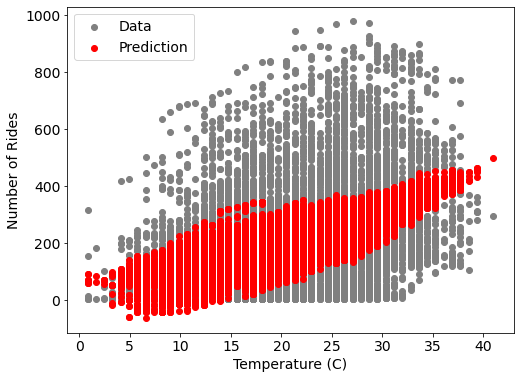

In [37]:

plt.scatter(X['temp'], y,  color='gray',label="Data")
plt.scatter(X['temp'], linreg.predict(X), color='red',label="Prediction")
plt.xlabel("Temperature (C)")
plt.ylabel("Number of Rides")
plt.legend(loc='upper left')
plt.show()

Feature engineering

There are some entries which are categorical (take discrete values):
weather, holiday/nonholiday, season

Weather 1 to 4 is ordered in a way that 'makes sense', the higher value has a clear meaning.

But what about season 1-4? The value 4 of Winter is bigger than the value 1 of Spring, but this  does not have a clear relation with the problem at hand. These values (bigger/smaller) are artificial. In this case we can do the next procedure using get_dummies


In [38]:
season_dummies = pd.get_dummies(bikes.season, prefix='season')
# Print five random rows.
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1


We  just need three dummy variables (not four), as Spring (season 1) is the baseline level. The information gained from three features is directly correlated to the fourth. So we drop the 1st column, and then concatenate



In [ ]:
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

In [39]:
# Print five random rows.
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1


In [40]:
# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
bikes_dummies = pd.concat([bikes, season_dummies], axis=1)

# Print five random rows.
bikes_dummies.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0,0,1,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,1,0,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0,0,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,0,1,0,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0,0,0,1


In [41]:
# Include dummy variables for season in the model.
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes_dummies[feature_cols]
y = bikes_dummies.total_rentals

linreg = LinearRegression()
linreg.fit(X, y)

list(zip(feature_cols, linreg.coef_))

[('temp', 11.18640586357579),
 ('season_2', -3.390543099718238),
 ('season_3', -41.736860713170714),
 ('season_4', 64.4159614682421),
 ('humidity', -2.81948163625964)]

In [42]:
# Compare original season variable with dummy variables.
print(train_test_rmse(bikes_dummies, ['temp', 'season', 'humidity']))
print(train_test_rmse(bikes_dummies, ['temp', 'season_2', 'season_3', 'season_4', 'humidity']))

155.59818936691417
154.33394593636


Not a huge gain! Now let's use the time.

In [43]:
bikes['hour'] = bikes.index.hour
# Encode hour as a categorical feature.
hour_dummies = pd.get_dummies(bikes.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes = pd.concat([bikes, hour_dummies], axis=1)

In [44]:
# Generate a daytime variable based on hour of the day. This is a rougher feature than time
bikes['daytime'] = bikes.hour.apply(lambda x: int((x < 21) and (x > 6)))
#  and test if you gained anything
print(train_test_rmse(bikes, ['hour']))
print(train_test_rmse(bikes, bikes.columns[bikes.columns.str.startswith('hour_')]))
print(train_test_rmse(bikes, ['daytime']))

165.67174264111398
128.31120502811194
144.89116360237938


The best predictions can be obtained using the hour information.

In [45]:
bikes_dummies['hour'] = bikes.index.hour


In [46]:
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity','hour']
X = bikes_dummies[feature_cols]
y = bikes_dummies.total_rentals

linreg = LinearRegression()
linreg.fit(X, y)

list(zip(feature_cols, linreg.coef_))

[('temp', 9.168026038642017),
 ('season_2', 15.45294579741671),
 ('season_3', -12.952253492558459),
 ('season_4', 67.41910047317381),
 ('humidity', -2.1807700478342547),
 ('hour', 7.316625377817674)]

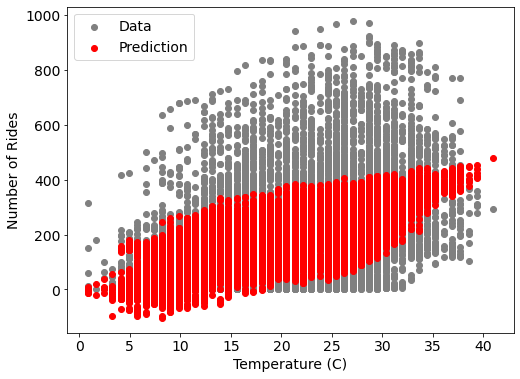

In [47]:
plt.scatter(X['temp'], y,  color='gray',label="Data")
plt.scatter(X['temp'], linreg.predict(X), color='red',label="Prediction")
plt.xlabel("Temperature (C)")
plt.ylabel("Number of Rides")
plt.legend(loc='upper left')
plt.show()

Regularization

General advice: Features should be normalized [see here about preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

How should you choose between lasso regression and ridge regression?

Lasso regression is preferred if we believe many features are irrelevant or if we prefer a sparse model.

Ridge can work particularly well if there is a high degree of multicollinearity in your model.

If model performance is your primary concern, it is best to try both.

Elastic net regression is a combination of Lasso regression and Ridge Regression.


In [48]:
# Include dummy variables for season in the model.
feature_cols = ['temp', 'atemp', 'season_2', 'season_3', 'season_4', 'humidity','hour']
X = bikes_dummies[feature_cols]
y = bikes_dummies.total_rentals
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [50]:
# alpha=0 is equivalent to linear regression.
from sklearn.linear_model import Ridge

# Instantiate the model.
#(Alpha of zero has no regularization strength, essentially a basic linear regression.)
ridgereg = Ridge(alpha=0)#, normalize=True) #normalise dropped from __init__

# Fit the model.
ridgereg.fit(X_train, y_train)

# Predict with fitted model.
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

149.7239512892635


In [51]:
# Coefficients for a non-regularized linear regression
list(zip(feature_cols, ridgereg.coef_))

[('temp', 6.632351969150117),
 ('atemp', 2.325054682937969),
 ('season_2', 11.01318423054029),
 ('season_3', -10.745586761078123),
 ('season_4', 65.2089144532173),
 ('humidity', -2.2073044521320955),
 ('hour', 7.39289934938694)]

In [53]:
# Try alpha=0.1.
ridgereg = Ridge(alpha=0.1)#, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

149.72400525273346


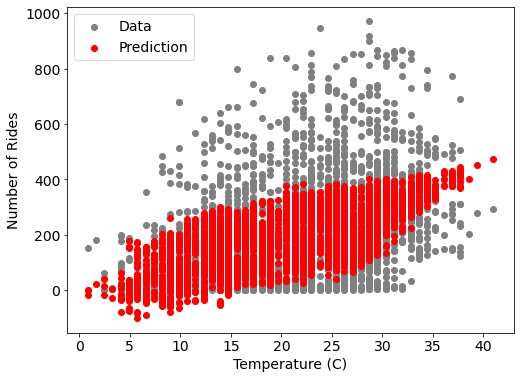

In [54]:
plt.scatter(X_test['temp'], y_test,  color='gray',label="Data")
plt.scatter(X_test['temp'], ridgereg.predict(X_test), color='red',label="Prediction")
plt.xlabel("Temperature (C)")
plt.ylabel("Number of Rides")
plt.legend(loc='upper left')
plt.show()

In [55]:
# alpha=0 is equivalent to linear regression.
from sklearn.linear_model import Lasso

# Instantiate the model.
#(Alpha of zero has no regularization strength, essentially a basic linear regression.)
lassoreg = Lasso(alpha=0)#, normalize=True) #normalise dropped from __init__

# Fit the model.
lassoreg.fit(X_train, y_train)

# Predict with fitted model.
y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

149.72395128926354


<ipython-input-55-4b025c7206f5>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassoreg.fit(X_train, y_train)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.673e+07, tolerance: 2.645e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [56]:
# Coefficients for a non-regularized linear regression
list(zip(feature_cols, ridgereg.coef_))

[('temp', 6.632312184257123),
 ('atemp', 2.325206956529458),
 ('season_2', 11.007938171911224),
 ('season_3', -10.750530304667926),
 ('season_4', 65.20166762210748),
 ('humidity', -2.2072787433573744),
 ('hour', 7.392891175225175)]

In [57]:
# Try alpha=0.1.
lassoreg = Lasso(alpha=0.1)#, normalize=True)
lassoreg.fit(X_train, y_train)
y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

149.74223501474248


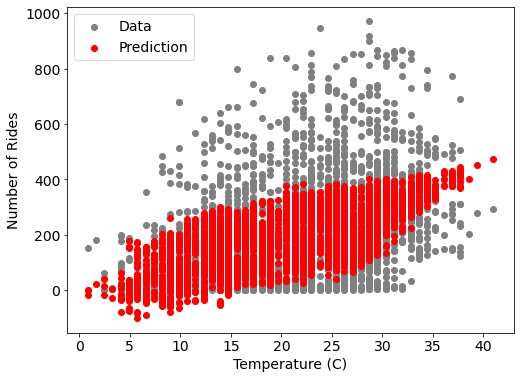

In [58]:
plt.scatter(X_test['temp'], y_test,  color='gray',label="Data")
plt.scatter(X_test['temp'], ridgereg.predict(X_test), color='red',label="Prediction")
plt.xlabel("Temperature (C)")
plt.ylabel("Number of Rides")
plt.legend(loc='upper left')
plt.show()